In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


### 실습 1 로지스틱 회귀분석

#### Step 1. 데이터 구성하기 

In [5]:
df = pd.read_csv('/home/piai/PABA_27/BigData/lecture/01 실습파일/2. Big Data 분석/통신고객이탈.csv')
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    object 
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 109.1+ K

In [7]:
print("Data 구조: ", df.shape)  
print("변수 : ", df.columns)

Data 구조:  (930, 15)
변수 :  Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')


#### Step 2. 데이터 전처리 

In [8]:
# 결측치 확인 
df.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

- 결측치를 가진 변수가 없다. 

In [55]:
# 데이터 분할 
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 2024)

print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (651, 15)
test data size: (279, 15)


#### Step 3. 로지스틱 회귀모델 및 회귀계수 검토 

- 범주형 변수는 "C"를 표시해야 한다. 
- 주어진 데이터셋에서 범주형과 연속형 변수를 정리하면 다음과 같다.

    범주형 변수

        CHURN (Active/Churned) - 목표변수
        CUSTOMER_ID (고유 식별자)
        GENDER (성별)
        CHARGE_TYPE (요금 유형)
        HANDSET (핸드셋)
        USAGE_BAND (사용량 대역)

    연속형 변수

        AGE (나이)
        SERVICE_DURATION (서비스 이용 기간)
        DROPPED_CALLS (통화 중 끊김 수)
        PEAK_CALLS_NO (피크 시간대 통화 수)
        PEAK_CALLS_TIME (피크 시간대 통화 시간)
        WEEKEND_CALLS_NO (주말 통화 수)
        WEEKEND_CALLS_TIME (주말 통화 시간)
        TOTAL_CALLS_NO (총 통화 수)
        TOTAL_CALLS_TIME (총 통화 시간)

- CHURN 변수를 회귀 모델의 종속 변수로 사용하기 위해서는 숫자형으로 변환해야한다. 
  일반적으로 이진 분류에서는 0과 1로 변환한다. (Active=0, Churned=1)
- Customer-ID는 제외하고 분석을 진행한다. 

In [56]:
df['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [57]:
# CHURN 변수를 0과 1로 변환 (예: Active = 0, Churned = 1)
df_train['CHURN'] = df_train['CHURN'].replace({'Active': 0, 'Churned': 1})
df_test['CHURN'] = df_test['CHURN'].replace({'Active': 0, 'Churned': 1})

# 데이터 타입 확인 (디버깅용)
print(df_train['CHURN'].dtype)
print(df_test['CHURN'].dtype)

int64
int64


In [58]:
df['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [59]:
df['CHURN'].isnull().sum()

0

- CHURN 변수의 값들이 결측치없이 0과 1로 잘 변환되었다. 

In [60]:
# 변수 역할 지정 
# 모델 적합
log_model = Logit.from_formula(
    """CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME""",
    df_train
)

# 적합 
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.209048
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.5646
Time:                        14:38:22   Log-Likelihood:                -136.09
converged:                      False   LL-Null:                       -312.59
Covariance Type:            nonrobust   LLR p-value:                 2.225e-57
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -18.8670    124.177     -0.152      0.879    -262.250     224.516
C(GENDER)[T.M]   

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- No.Observatione(전체 자료 수): 651   
  Df Residuals(잔차 자유도): 621   
  Df Model(모델 자유도): 29(Intercept 제외)
- Pseudo R-squ(설명력): 0.5646 
  -> 로지스틱 회귀분석의 설명력은 낮음

In [61]:
# 회귀 분석 결과 요약 데이터 (줄 단위로 분리)
summary_data = """
Intercept                    -24.1056   2065.442     -0.012      0.991   -4072.298    4024.086
C(GENDER)[T.M]                -0.4510      0.315     -1.433      0.152      -1.068       0.166
C(CHARGE_TYPE)[T.CAT 200]     -1.0671      0.640     -1.668      0.095      -2.321       0.187
C(CHARGE_TYPE)[T.CAT 50]      -1.6795      0.897     -1.873      0.061      -3.437       0.078
C(CHARGE_TYPE)[T.Play 100]     1.3482      0.725      1.860      0.063      -0.073       2.769
C(CHARGE_TYPE)[T.Play 300]    -0.9498      0.822     -1.156      0.248      -2.560       0.660
C(HANDSET)[T.ASAD90]          22.5142   2065.441      0.011      0.991   -4025.676    4070.704
C(HANDSET)[T.BS110]           18.1048   2065.441      0.009      0.993   -4030.085    4066.294
C(HANDSET)[T.BS210]           15.6798   2065.441      0.008      0.994   -4032.510    4063.870
C(HANDSET)[T.CAS30]           21.3585   2065.441      0.010      0.992   -4026.831    4069.548
C(HANDSET)[T.CAS60]          -35.9285   3.55e+11  -1.01e-10      1.000   -6.96e+11    6.96e+11
C(HANDSET)[T.S50]             18.5695   2065.441      0.009      0.993   -4029.620    4066.759
C(HANDSET)[T.S80]             17.3164   2065.441      0.008      0.993   -4030.873    4065.506
C(HANDSET)[T.SOP10]           21.2286   2065.441      0.010      0.992   -4026.962    4069.419
C(HANDSET)[T.SOP20]           50.5815   2.74e+06   1.85e-05      1.000   -5.37e+06    5.37e+06
C(HANDSET)[T.WC95]           -17.8978    1.6e+07  -1.12e-06      1.000   -3.14e+07    3.14e+07
C(USAGE_BAND)[T.Low]           6.3481      2.240      2.834      0.005       1.958      10.738
C(USAGE_BAND)[T.Med]           3.6729      1.415      2.595      0.009       0.899       6.447
C(USAGE_BAND)[T.MedHigh]       2.0429      0.991      2.061      0.039       0.100       3.985
C(USAGE_BAND)[T.MedLow]        5.8815      1.779      3.305      0.001       2.394       9.369
C(USAGE_BAND)[T.None]        -13.4211   1.54e+04     -0.001      0.999   -3.02e+04    3.02e+04
AGE                           -0.0215      0.011     -1.878      0.060      -0.044       0.001
SERVICE_DURATION              -0.0303      0.011     -2.832      0.005      -0.051      -0.009
DROPPED_CALLS                  0.1369      0.039      3.465      0.001       0.059       0.214
PEAK_CALLS_NO                 -0.0012      0.003     -0.465      0.642      -0.006       0.004
PEAK_CALLS_TIME                0.0024      0.002      1.548      0.122      -0.001       0.005
WEEKEND_CALLS_NO              -0.0054      0.013     -0.406      0.685      -0.031       0.021
WEEKEND_CALLS_TIME             0.0045      0.006      0.776      0.438      -0.007       0.016
TOTAL_CALLS_NO                 0.0011      0.002      0.435      0.664      -0.004       0.006
TOTAL_CALLS_TIME               0.0008      0.002      0.534      0.593      -0.002       0.004
"""

# 유의 수준 설정
alpha = 0.05

# 유의한 변수와 유의하지 않은 변수 저장할 세트 초기화
significant_vars = set()
non_significant_vars = set()

# 요약 데이터를 줄 단위로 분리
lines = summary_data.strip().split('\n')

# 각 줄을 처리하여 변수와 P-value를 추출
for line in lines:
    parts = line.split()
    if len(parts) < 5:
        continue  # P-value가 없는 경우 스킵
    var_name = parts[0]
    p_value = float(parts[4])  # P>|z| 값은 parts[4]에 위치
    
    # 변수명을 정리하여 파생 변수의 베이스 변수명을 추출
    base_var_name = var_name.split('[')[0]

    # 유의성 판별
    if p_value < alpha:
        significant_vars.add(base_var_name)
    else:
        non_significant_vars.add(base_var_name)

# 파생 변수 중 하나라도 유의하면 해당 변수 전체를 유의하다고 결정
all_vars = significant_vars.union(non_significant_vars)
final_significant_vars = {var for var in all_vars if var in significant_vars}

# 결과 출력
print("유의한 변수들 (P < 0.05):", final_significant_vars)
print("유의하지 않은 변수들 (P >= 0.05):", non_significant_vars - significant_vars)

유의한 변수들 (P < 0.05): {'C(USAGE_BAND)', 'SERVICE_DURATION', 'C(CHARGE_TYPE)', 'DROPPED_CALLS'}
유의하지 않은 변수들 (P >= 0.05): {'TOTAL_CALLS_NO', 'AGE', 'Intercept', 'C(GENDER)', 'PEAK_CALLS_NO', 'TOTAL_CALLS_TIME', 'WEEKEND_CALLS_TIME', 'C(HANDSET)', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO'}


In [63]:
# 회귀계수가 유의한 변수만 사용한 모델 
# 회귀계수 유의성 기준 제외변수: AGE, C(GENDER), PEAK_CALLS_NO, TOTAL_CALLS_TIME, INTERCEPT, WEEKEND_CALLS_NO, PEAK_CALLS_TIME, C(GENDER), TOTAL_CALLS_NO, WEEKEND_CALL
log_model = Logit.from_formula("""CHURN ~ C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS""", df_train)

# 적합 
log_result = log_model.fit()

# 결과 출력 
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.431575
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.1012
Time:                        14:39:59   Log-Likelihood:                -280.96
converged:                       True   LL-Null:                       -312.59
Covariance Type:            nonrobust   LLR p-value:                 2.268e-09
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.3560      0.562     -2.414      0.016      

- No.Observations(전체 자료 수): 651
- Df Residuals(잔차 자유도): 639   
  Df Model(모델 자유도): 11 (Intercept 제외)
- Pseudo R-squ(설명력): 0.1012 -> 약간 낮아졌다.   
  -> 유의 변수(<0.05 기준): 전체 

#### Step 4. 예측 및 성능 평가 

In [64]:
# Train 데이터 예측
y_pred_train = log_result.predict(df_train)
y_pred_train_binary = (y_pred_train > 0.5).astype(int)

print("Train 예측결과 \n", y_pred_train, "\n")
print("Confusion Matrix \n: ", confusion_matrix(df_train['CHURN'], y_pred_train_binary))


Train 예측결과 
 769    0.108031
487    0.225614
47     0.133103
736    0.085450
550    0.198058
         ...   
539    0.103201
640    0.095082
608    0.101796
506    0.141000
648    0.223899
Length: 651, dtype: float64 

Confusion Matrix 
:  [[522   8]
 [108  13]]


In [65]:
# 실제 train 데이터와 예측 결과 비교 
print("Train 예측/분류 결과")
print("Accuracy: ", accuracy_score(df_train['CHURN'], y_pred_train_binary))
print("Confusion Matrix: \n", confusion_matrix(df_train['CHURN'], y_pred_train_binary))
print("Classification Report: \n", classification_report(df_train['CHURN'], y_pred_train_binary))

Train 예측/분류 결과
Accuracy:  0.8218125960061444
Confusion Matrix: 
 [[522   8]
 [108  13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       530
           1       0.62      0.11      0.18       121

    accuracy                           0.82       651
   macro avg       0.72      0.55      0.54       651
weighted avg       0.79      0.82      0.77       651



 - 회귀계수 유의성 검정 
  z = coef/(std err), Wald 검정, P>|z|: p-value   
  -> 유의한 변수 (유의수준 0.05 기준)   
  : 'DROPPED_CALLS', 'SERVICE_DURATION', 'C(USAGE_BAND)', 'C(CHARGE_TYPE)'   
  -> 유의하지 않은 변수 (제거)
  : 'AGE', 'PEAK_CALLS_NO', 'TOTAL_CALLS_TIME', 'Intercept', 'WEEKEND_CALLS_TIME', 'PEAK_CALLS_TIME', 'C(GENDER)', 'TOTAL_CALLS_NO', 'WEEKEND_CALLS_NO', 'C(HANDSET)'

In [66]:
# Test 데이터 예측
y_pred_test = log_result.predict(df_test)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

print("Test 예측결과 \n", y_pred_test, "\n")
print("Confusion Matrix \n: ", confusion_matrix(df_test['CHURN'], y_pred_test_binary))

Test 예측결과 
 69     0.110912
163    0.099068
597    0.260068
484    0.105545
440    0.086694
         ...   
823    0.782311
122    0.077185
632    0.125789
556    0.093515
270    0.792453
Length: 279, dtype: float64 

Confusion Matrix 
:  [[218   2]
 [ 49  10]]


In [67]:
# 실제 test 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: ", accuracy_score(df_test['CHURN'], y_pred_test_binary))
print("Confusion Matrix: \n", confusion_matrix(df_test['CHURN'], y_pred_test_binary))
print("Classification Report: \n", classification_report(df_test['CHURN'], y_pred_test_binary))

Test 예측/분류 결과
Accuracy:  0.8172043010752689
Confusion Matrix: 
 [[218   2]
 [ 49  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       220
           1       0.83      0.17      0.28        59

    accuracy                           0.82       279
   macro avg       0.82      0.58      0.59       279
weighted avg       0.82      0.82      0.77       279



- 모델의 Test 데이터 정분류율은 81%이다.    
- 분류 내용    
  - 실제 0을 0으로 분류 218건
  - 실제 1을 0으로 분류 49건 
- "1" 기준 f1 score는 28% (precision은 높으나 상대적으로 recall은 조금 낮음)

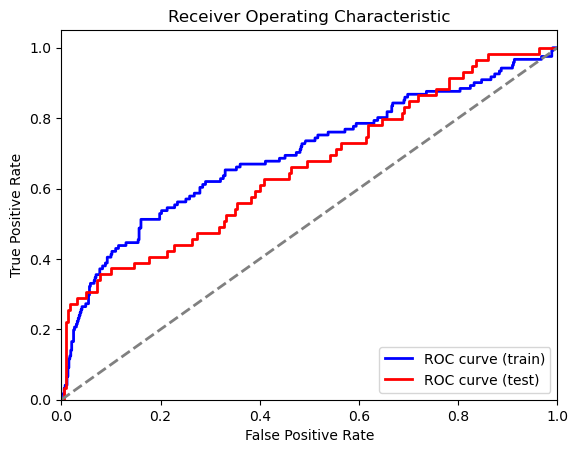

In [68]:
# ROC 곡선 그리기
fpr_train, tpr_train, _ = roc_curve(df_train['CHURN'], y_pred_train)
fpr_test, tpr_test, _ = roc_curve(df_test['CHURN'], y_pred_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train)')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (test)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Step 5. 결론 도출 

<Axes: >

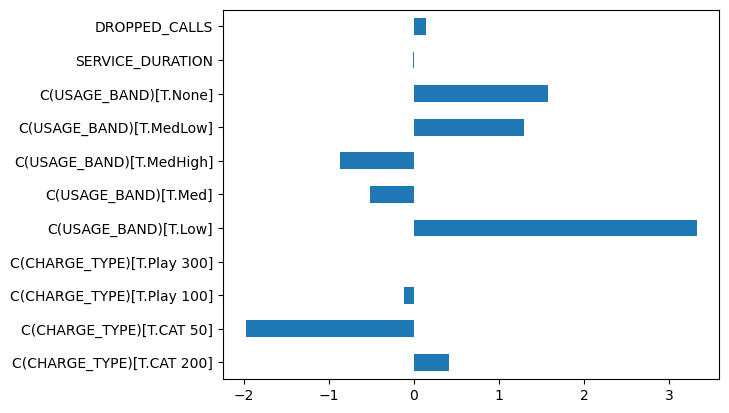

In [69]:
# 설명변수 중요도 
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef', legend = False)

- 이 그래프는 회귀 모델의 회귀 계수를 시각화한 것이다. 각 막대는 각 변수의 회귀 계수를 나타내며, 값들이 종속변수(CHURN)에 미치는 영향을 설명한다. 
- 변수의 값이 증가할수록 CHURN의 확률이 증가하고, 계수의 절대값이 클수록 변수의 영향력이 크다. 
- C(USAGE_BAND)[T.Low], C(USAGE_BAND)[T.None], C(USAGE_BAND)[T.MedLow] 순으로 변수 중요도가 높다. 
- 고객 이탈을 줄이려면, 끊긴 통화 횟루를 줄이고, 서비스 이용 기간을 늘리는 것이 중요하다. 또한, 특정 요금제를 사용하도록 유도하고, 사용 대역이 낮은 고객을 특별히 관리해야 한다. 

In [73]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df.select_dtypes(include = "object")
df_numeric = df.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


- CHURN 변수도 scaling이 적용되었다. scale 대상에서 제외하거나 1/0로 재변환이 필요하다. 

In [74]:
# CHURN 데이터를 0과 1로 변환(정수형), np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["CHURN"] = np.where(df_scaled["CHURN"]> 0, 1, 0)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [75]:
# 데이터 분할 
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=2024)

In [76]:
# 선정된 설명변수 기준 
scaled_log_model = Logit.from_formula("""CHURN ~ C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS""", df_scaled_train)

# 적합 
scaled_log_result = scaled_log_model.fit()
# 결과 출력 
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.431575
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.1012
Time:                        14:59:35   Log-Likelihood:                -280.96
converged:                       True   LL-Null:                       -312.59
Covariance Type:            nonrobust   LLR p-value:                 2.268e-09
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.4073      0.509     -2.766      0.006      

<Axes: >

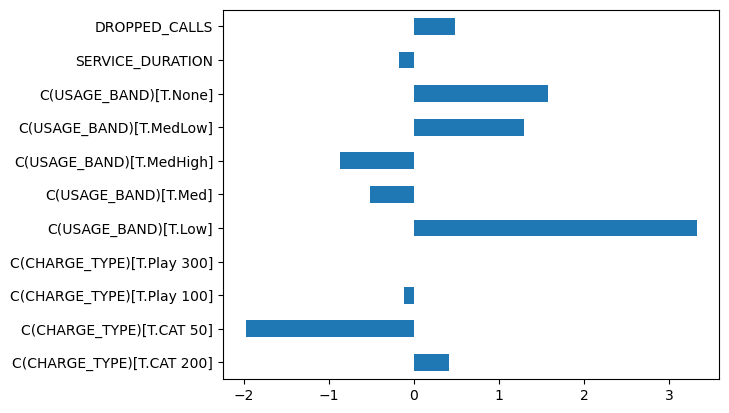

In [77]:
# 설명변수 중요도 
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef', legend = False)

- 스케일링을 하면 모델 학습의 안전성을 높이고, 특정 변수가 과도한 영향력을 갖지 않도록 조정한다. 로지스틱 회귀 모델에서 스케일링은 일반적으로 큰 효과를 나타내지 않을 수 있지만, 변수들 간의 균형을 맞춰준다. 
- 스케일링을 적용했더라도 해석의 기본 원칙은 변하지 않는다. 
- C(USAGE_BAND)[T.Low], C(USAGE_BAND)[T.None], C(USAGE_BAND)[T.MedLow] 순으로 변수 중요도가 높다. 

### 실습 2 의사결정나무 

#### Step 1. 데이터 생성하기 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    int64  
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 109.1+ K

In [89]:
# get dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_without_id = df.drop(columns=["CUSTOMER_ID"])
df_dummy = pd.get_dummies(df_without_id)
df_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,HANDSET_CAS60,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None,color_blue,color_red
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [82]:
# 데이터 분할: 설명변수, 목표변수 구분 
df_x = df_dummy.drop("CHURN", axis = 1, inplace=False)
df_y = df_dummy["CHURN"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 2024)

print("분할 전 설명변수 데이터: ", df_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, "Test: ", df_test_x.shape)

분할 전 설명변수 데이터:  (930, 33)
분할 후 설명변수 데이터: Train (651, 33) Test:  (279, 33)


In [83]:
%pip install imblearn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


CHURN
0        750
1        180
dtype: int64 

CHURN=1 비율:  0.1935483870967742


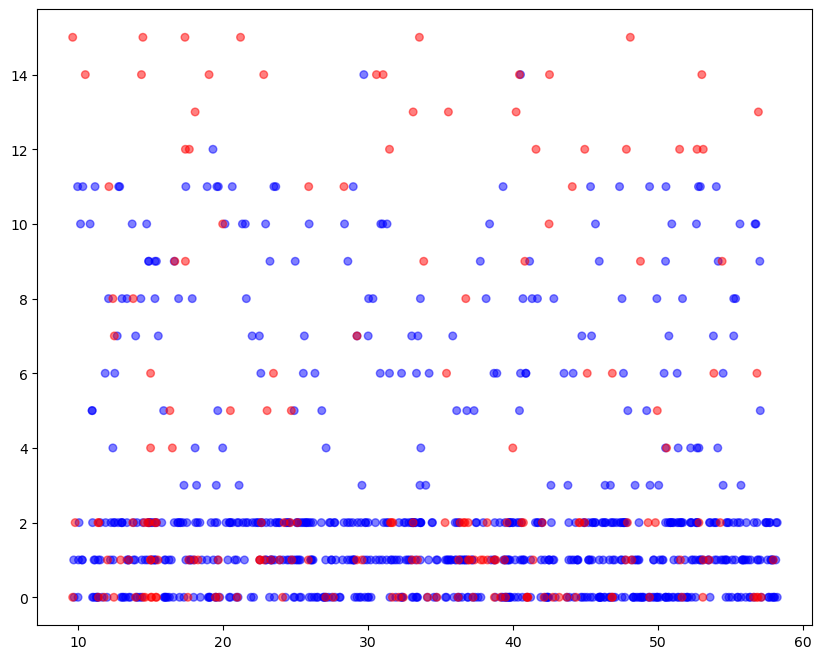

In [84]:
# 샘플링
from imblearn.over_sampling import SMOTE
# 목표변수 빈도 확인 
print(df.value_counts(["CHURN"]), "\n")
print("CHURN=1 비율: ", df.value_counts(["CHURN"])[1] / df.shape[0])
# 목표변수 산점도 확인 
plt.figure(figsize=(10, 8))
df['color'] = np.where(df["CHURN"] == 1, 'red', 'blue') # CHURN=1: red, CHURN=0: blue
plt.scatter(df['SERVICE_DURATION'], df['DROPPED_CALLS'], color = df['color'], s=30, alpha=0.5)
plt.show()


In [87]:
# Over-Sampling 
sm = SMOTE(sampling_strategy="auto")
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)
# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    530
1    121
Name: CHURN, dtype: int64 

Over-Sampling 후 Train X: (1060, 33)
Over-Sampling 후 Train Y: (1060,) 

Over-Sampling 후 '1':530
Over-Sampling 후 '0':530


   AGE  SERVICE_DURATION  ...  USAGE_BAND_None  CHURN
0   27             47.87  ...                0      1
1   44             35.33  ...                0      0
2   49             28.57  ...                0      0
3   32             52.30  ...                0      0
4   47             38.13  ...                0      0

[5 rows x 34 columns]


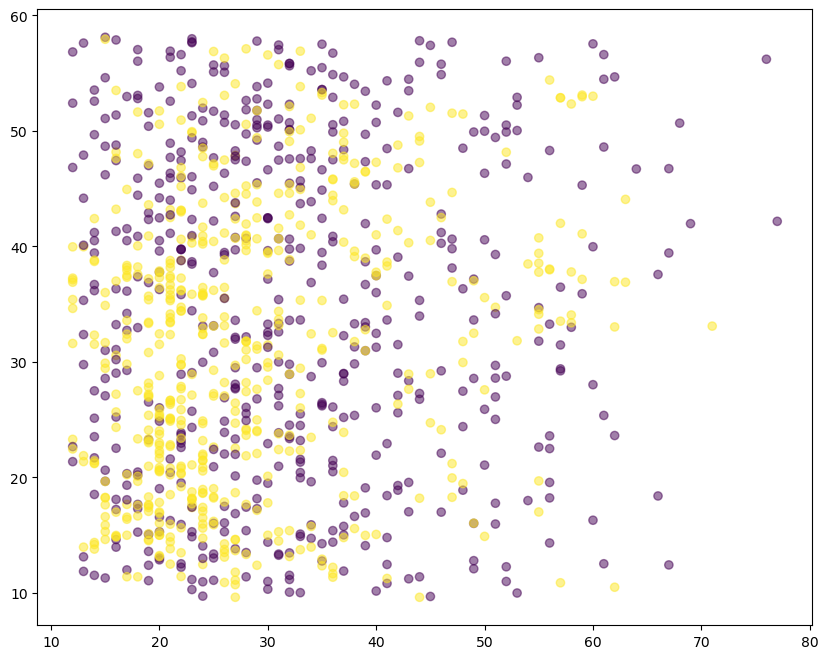

In [90]:
# 데이터 결합 및 산점도 확인
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# 목표변수 산점도 확인:위와 다른 방식으로 색깔 구분
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['AGE'],df_resampled['SERVICE_DURATION'],
            c=df_resampled['CHURN'],alpha=0.5)
plt.show()

#### Step 2. 모델 생성 - Parameter 조정/평가

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_uncust = DecisionTreeClassifier(random_state=2024 )
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.828


In [92]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 2024, 'best'])


##### 모델 Parameter 조정 - 최대 깊이 변경 

In [93]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [94]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.908,0.871
1,4,0.914,0.832
2,5,0.932,0.842
3,6,0.948,0.853
4,7,0.963,0.846
5,8,0.974,0.839
6,9,0.982,0.814
7,10,0.983,0.832
8,11,0.989,0.821


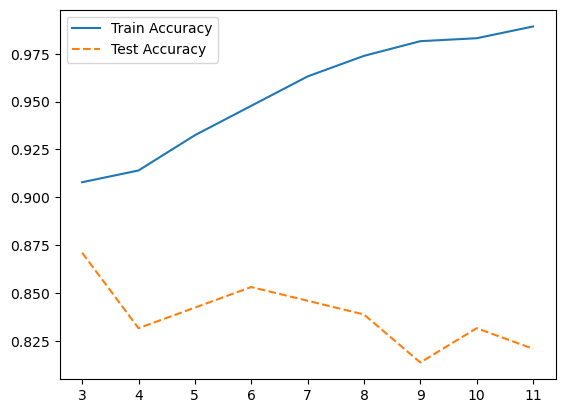

In [95]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 최대 깊이 증가에 따라 모델의 정확도는 증가한다. (Train 기준)
- Train/Test 데이터에 따른 모델 성능 변화와 파라미터 특성을 고려하여 6을 선택한다. 
- 3: 과소적합이다/ 10: Train과 Test 차이가 크다. 

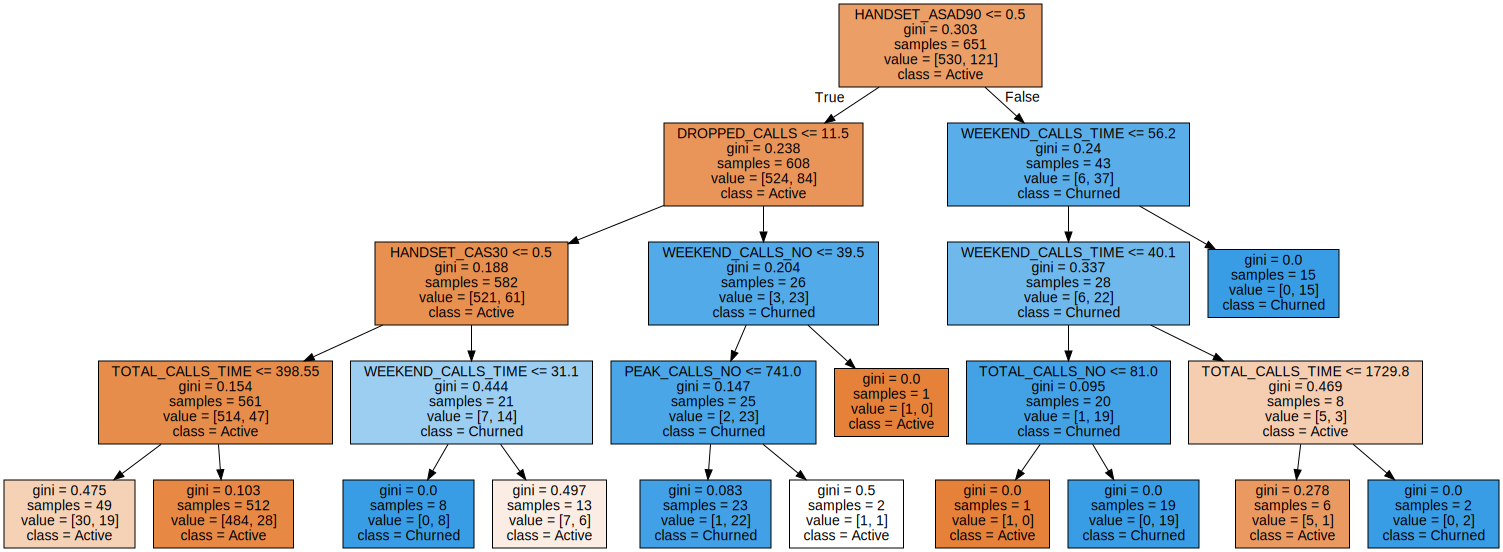

In [99]:
from sklearn.tree import export_graphviz
import graphviz

v_feature_name = df_train_x.columns
# 깊이: 얕은 모델 
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=2024)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0:Active, 1:Churned)
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

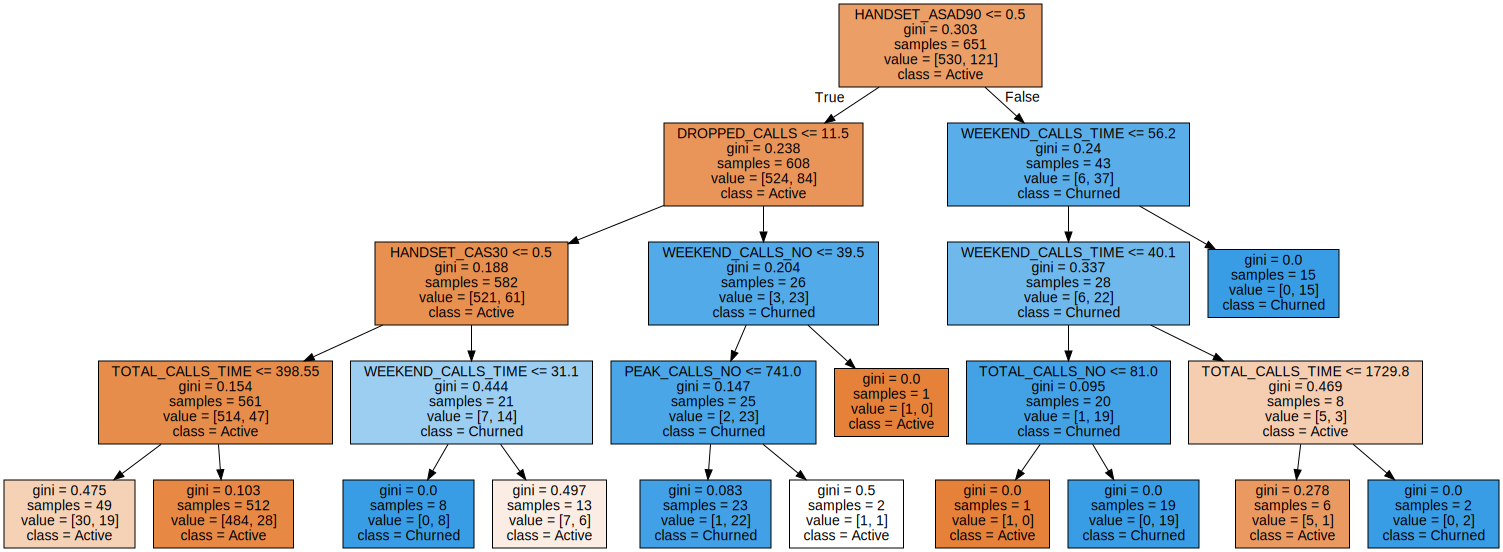

In [100]:
# 깊이: 깊은 모델 
tree_high = DecisionTreeClassifier(max_depth = 6, random_state=2024)
tree_high.fit(df_train_x, df_train_y)
# 트리 모델을 tree_high.dot 파일로 저장. (목표변수, 0:Active, 1:Churned)
export_graphviz(tree_high, out_file="tree_high.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
display(graphviz.Source(dot_graph))

##### 모델 Parameter 조정 - 분리 노드의 최소 자료 수 변경 

In [101]:
# 참조:적정 자료 수 검토
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  651 개
전체 자료의 1% =  6.51 개


In [102]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [103]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.942,0.832
1,30,0.923,0.864
2,40,0.923,0.864
3,50,0.911,0.860
4,60,0.911,0.860
5,70,0.906,0.864
6,80,0.906,0.864
7,90,0.906,0.864
8,100,0.906,0.864
9,110,0.903,0.871


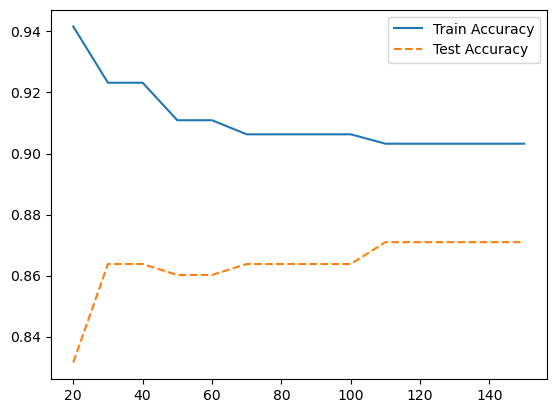

In [104]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

- 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소한다. 
- 30부터 감소하기 시작하여 조금씩 감소하는 형태를 보인다. 전체 자료수 및 파라미터 특징을 고려하여 120을 선택한다. 

##### 모델 Parameter 조정 - 분리 노드의 최소 샘플수 변경 

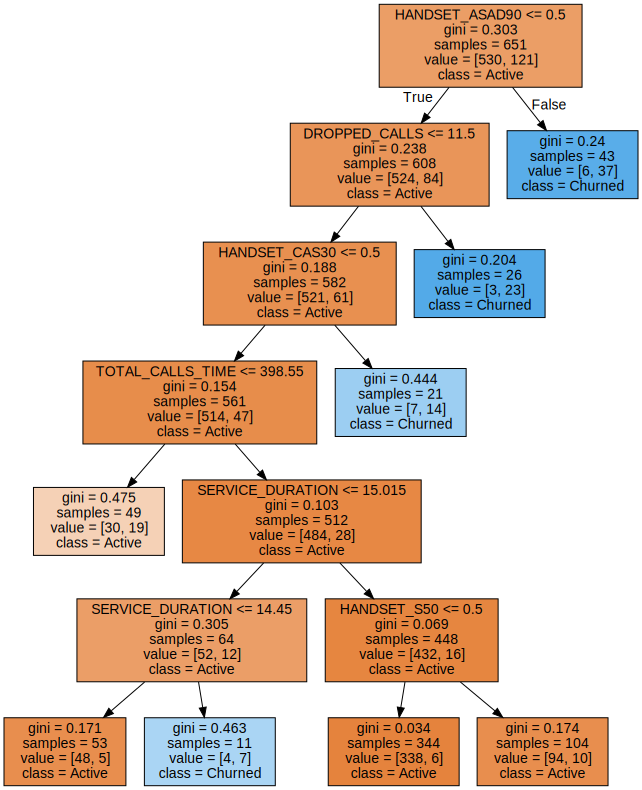

In [106]:
# 분리 노드의 최소 자료 수:적은 모델
tree_low = DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=2024)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

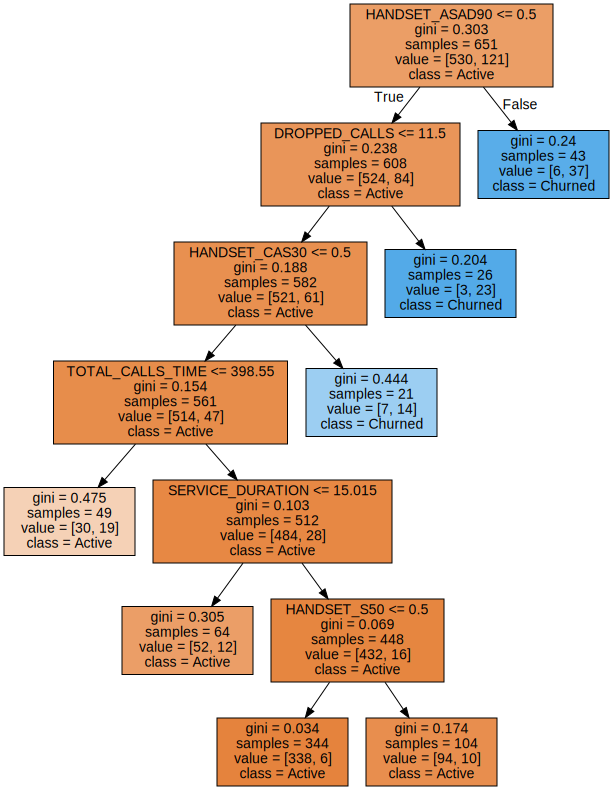

In [107]:
# 분리 노드의 최소 자료 수:많은 모델
tree_high = DecisionTreeClassifier(max_depth=6, min_samples_split=200, random_state=2024)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### 모델 Parameter 조정 - 잎사귀 노드의 샘플 수 조정 

In [109]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=120, \
		max_depth=6, random_state=2024)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [110]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.903,0.871
1,12,0.903,0.871
2,14,0.903,0.871
3,16,0.903,0.871
4,18,0.903,0.871
5,20,0.903,0.871
6,22,0.892,0.828
7,24,0.892,0.828
8,26,0.892,0.828
9,28,0.868,0.824


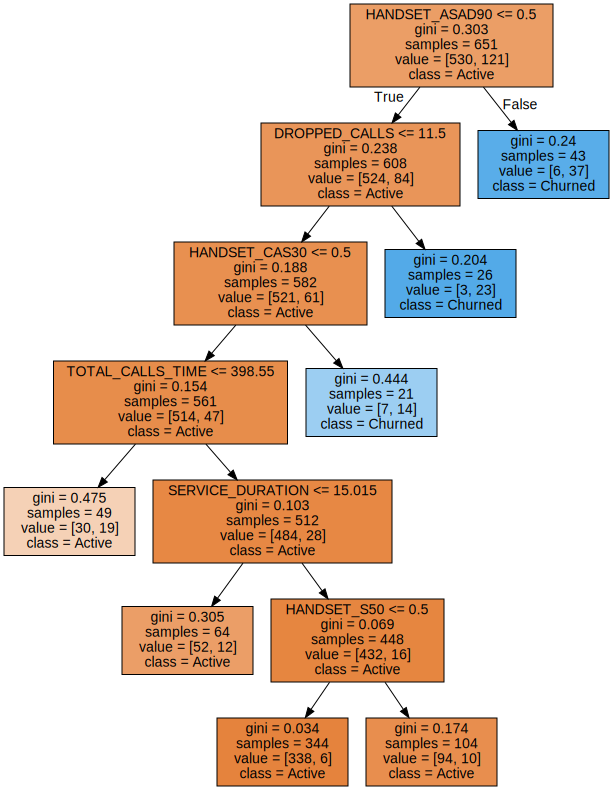

In [111]:
# 잎사귀의 최소 자료 수가 8인 모델 
tree_low = DecisionTreeClassifier(max_depth=6, min_samples_split=120, min_samples_leaf=8, random_state=2024)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

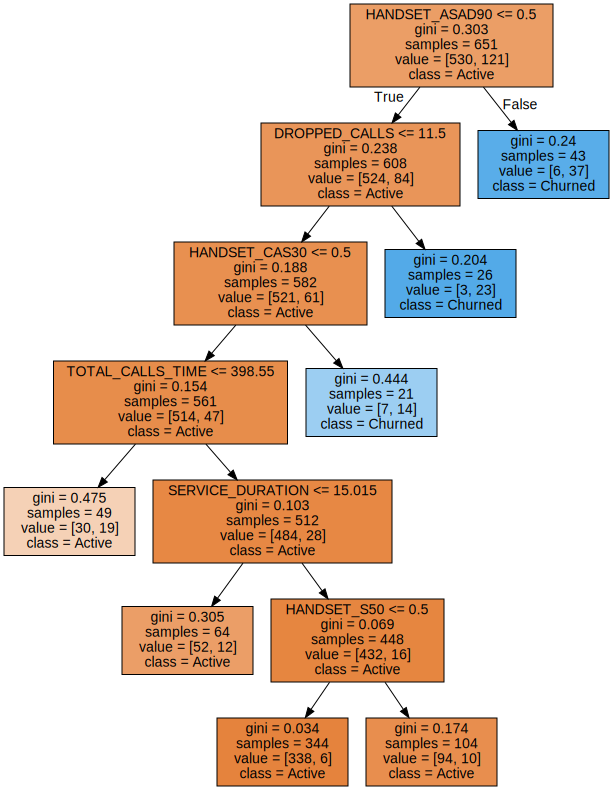

In [112]:
# 잎사귀의 최소 자료 수가 10인 모델
tree_high = DecisionTreeClassifier(max_depth=6, min_samples_split=120, min_samples_leaf=10, random_state=2024)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names=["Active", "Churned"],
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Step 3. 최종 모델 선정/시각화 

In [113]:
tree_final = DecisionTreeClassifier(max_depth=6, min_samples_split=120, min_samples_leaf=8, random_state=2024)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=120,
                       random_state=2024)

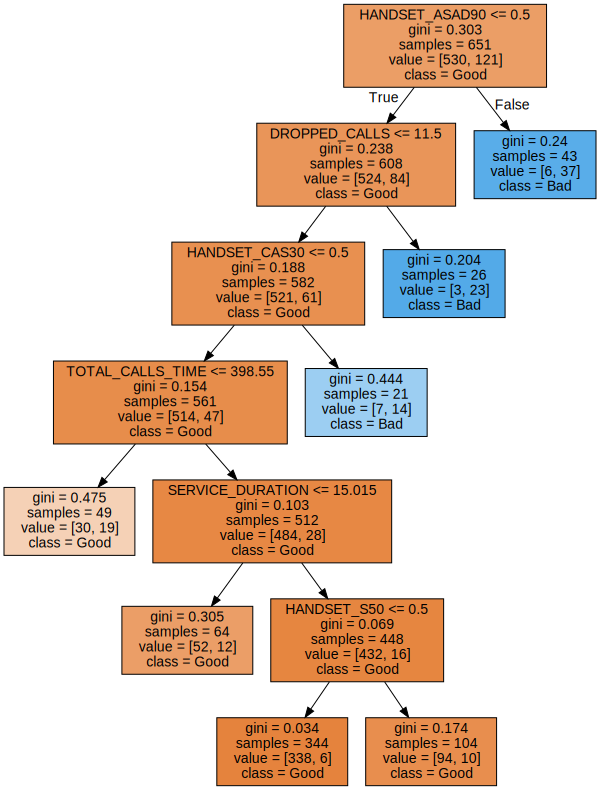

In [114]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [115]:
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy: 0.871

Test Confusion matrix: 
[[215   5]
 [ 31  28]]
              precision    recall  f1-score   support

           0      0.874     0.977     0.923       220
           1      0.848     0.475     0.609        59

    accuracy                          0.871       279
   macro avg      0.861     0.726     0.766       279
weighted avg      0.869     0.871     0.856       279



- Test 데이터 기준 정분류율은 87.1%이다. 
- "1" 기준 F1-score는 60.9%이다. (Precision이 높으나 Recall이 낮다)

#### Step 4. 결론 도출 

In [116]:
# 설명변수 중요도 확인 및 테이블로 저장 
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True) 
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.421
2,DROPPED_CALLS,0.304
20,HANDSET_CAS30,0.138
8,TOTAL_CALLS_TIME,0.100
1,SERVICE_DURATION,0.026
22,HANDSET_S50,0.010
25,HANDSET_SOP20,0.000
21,HANDSET_CAS60,0.000
23,HANDSET_S80,0.000
24,HANDSET_SOP10,0.000


Text(0, 0.5, '설명변수')

/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/envs/paba/lib/python3.10/sit

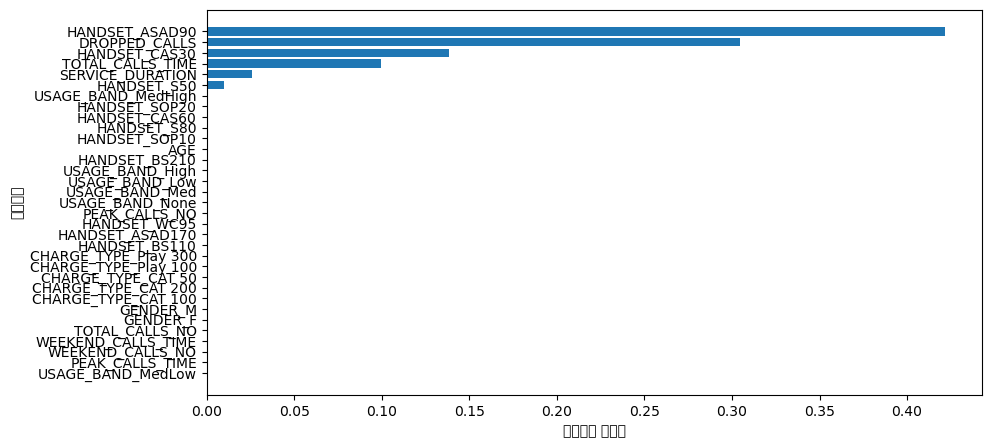

In [117]:
# 설명변수 중요도 그래프
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 중요 설명변수: 트리 생성시 HANDSET_ASAD90, DROPPED_CALLS, HANDSET_CAS30 순으로 중요하다. 
- 단, 계산된 변수 중요도 값이 갖거나 0이더라도 선택되는 Train 데이터에 따라 중요도도 변경될 수 있다. 

### 실습 3 랜덤포레스트

#### Step 1. 데이터 구성하기 

#### Step 2. 모델 생성 - Parameter 조정/평가

#### Step 3. 결론 도출